<a href="https://colab.research.google.com/github/tftitifff/Binary-Classification-using-Logistic-Regression/blob/main/COSC6338ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstrate Logistic Regression

Training the logistic regression model...

Learning Rate and Stop Criteria Discussions:
- We're using sklearn's LogisticRegression, which uses 'lbfgs' solver by default.
- This solver doesn't use a fixed learning rate, but adapts it during optimization.
- The stop criteria is controlled by 'tol' and 'max_iter' parameters.

Learning Rate Settings:
- As mentioned, 'lbfgs' solver adapts the learning rate automatically.
- We can control the convergence with 'tol' parameter, set to 1e-4 by default.

Stop Criteria Settings:
- max_iter: Maximum number of iterations, set to 1000
- tol: Tolerance for stopping criteria, set to 1e-4

Parameters Obtaining Discussions:
- The model learns the coefficients (weights) for each feature.
- It also learns an intercept term.
- The optimization process minimizes the log-loss function.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def load_data(filename):
    print(f"Loading data from {filename}")
    data = pd.read_csv(filename)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    print(f"Shape of data: {data.shape}")
    print(f"Features: {X.columns.tolist()}")
    print(f"Target variable distribution:\n{y.value_counts(normalize=True)}")

    # Convert categorical variables to one-hot encoding
    X = pd.get_dummies(X, drop_first=True)

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y

# Training
print("Loading training data...")
X_train, y_train = load_data('TrainData.csv')

print("\nTraining the logistic regression model...")

# Model training
model = LogisticRegression(random_state=42, max_iter=1000, tol=1e-4)
model.fit(X_train, y_train)

# Parameters obtaining discussions
print("\nParameters Obtaining Discussions:")
print("- The model learns the coefficients (weights) for each feature.")
print("- It also learns an intercept term.")
print("- The optimization process minimizes the log-loss function.")

# Testing
print("\nLoading test data...")
X_test, y_test = load_data('TestData.csv')

print("\nMaking predictions on test data...")
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate and print metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show the accuracy value on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test data: {accuracy:.4f}")

# Show the detailed trained parameters
print("\nDetailed Trained Parameters:")
print(f"Intercept: {model.intercept_[0]:.4f}")
print(f"Number of features: {len(model.coef_[0])}")
print("Coefficients (weights) for each feature:")
for i, coef in enumerate(model.coef_[0]):
    print(f"Feature {i}: {coef:.4f}")

# Additional diagnostics
print("\nPrediction Probabilities Distribution:")
print(np.histogram(y_pred_proba, bins=10))

print("\nRange of Prediction Probabilities:")
print(f"Min: {y_pred_proba.min():.4f}, Max: {y_pred_proba.max():.4f}")

print("\nDistribution of Predicted Classes:")
print(pd.Series(y_pred).value_counts(normalize=True))

print("\nModel Convergence Information:")
print(f"Number of iterations: {model.n_iter_[0]}")
print(f"Converged: {'Yes' if model.n_iter_[0] < 1000 else 'No, reached max_iter'}")

Loading training data...
Loading data from TrainData.csv
Shape of data: (30162, 15)
Features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14']
Target variable distribution:
y
-1    0.751078
 1    0.248922
Name: proportion, dtype: float64

Training the logistic regression model...

Parameters Obtaining Discussions:
- The model learns the coefficients (weights) for each feature.
- It also learns an intercept term.
- The optimization process minimizes the log-loss function.

Loading test data...
Loading data from TestData.csv
Shape of data: (15060, 15)
Features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14']
Target variable distribution:
y
-1    0.754316
 1    0.245684
Name: proportion, dtype: float64

Making predictions on test data...

Confusion Matrix:
[[10587   773]
 [ 1669  2031]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.86      0.93      0.90

********************************************************************************


instaling and importing the libraries.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, ADASYN

# Suppress warnings
import warnings
warnings.filterwarnings(action="ignore")

# Set pandas display options
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
!pip install imblearn -qqq

underanding the data and preprocessing the data!

In [ ]:
train_df = pd.read_csv('TrainData.csv')
train_df.head(10)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
0,0.043,5,-1.063,0,1.129,2,8,3,0,1,0.146,-0.219,-0.078,0,-1
1,0.880,1,-1.008,0,1.129,0,4,2,0,1,-0.147,-0.219,-2.332,0,-1
2,-0.033,0,0.245,3,-0.440,1,6,3,0,1,-0.147,-0.219,-0.078,0,-1
3,1.109,0,0.425,2,-1.224,0,6,2,4,1,-0.147,-0.219,-0.078,0,-1
4,-0.795,0,1.407,0,1.129,0,5,0,4,0,-0.147,-0.219,-0.078,12,-1
5,-0.109,0,0.897,10,1.521,0,4,0,0,0,-0.147,-0.219,-0.078,0,-1
6,0.804,0,-0.280,7,-2.008,5,2,3,4,0,-0.147,-0.219,-2.081,18,-1
7,1.032,1,0.188,3,-0.440,0,4,2,0,1,-0.147,-0.219,0.340,0,1
8,-0.566,0,-1.363,10,1.521,2,5,3,0,0,1.754,-0.219,0.757,0,1
9,0.271,0,-0.287,0,1.129,0,4,2,0,1,0.552,-0.219,-0.078,0,1


In [ ]:
test_df = pd.read_csv('TestData.csv')
test_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
0,-0.805,4,1.395,5,0.738,0,12,2,0,1,-0.145,-0.219,-0.079,0,1
1,0.391,0,-0.277,1,-0.044,0,7,2,4,1,0.853,-0.219,-0.079,0,1
2,1.811,1,-0.805,4,1.910,0,5,2,0,1,0.257,-0.219,-0.742,0,1
3,1.960,0,-0.049,3,-0.435,0,7,2,0,1,0.688,-0.219,-0.079,0,1
4,0.690,0,0.853,3,-0.435,0,7,2,0,1,0.257,-0.219,0.584,0,1


In [ ]:
test_df = pd.read_csv('TestData.csv')
test_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
0,-0.805,4,1.395,5,0.738,0,12,2,0,1,-0.145,-0.219,-0.079,0,1
1,0.391,0,-0.277,1,-0.044,0,7,2,4,1,0.853,-0.219,-0.079,0,1
2,1.811,1,-0.805,4,1.910,0,5,2,0,1,0.257,-0.219,-0.742,0,1
3,1.960,0,-0.049,3,-0.435,0,7,2,0,1,0.688,-0.219,-0.079,0,1
4,0.690,0,0.853,3,-0.435,0,7,2,0,1,0.257,-0.219,0.584,0,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      30162 non-null  float64
 1   x2      30162 non-null  int64  
 2   x3      30162 non-null  float64
 3   x4      30162 non-null  int64  
 4   x5      30162 non-null  float64
 5   x6      30162 non-null  int64  
 6   x7      30162 non-null  int64  
 7   x8      30162 non-null  int64  
 8   x9      30162 non-null  int64  
 9   x10     30162 non-null  int64  
 10  x11     30162 non-null  float64
 11  x12     30162 non-null  float64
 12  x13     30162 non-null  float64
 13  x14     30162 non-null  int64  
 14  y       30162 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 3.5 MB


In [ ]:
train_df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
count,30162.000,30162.000,30162.000,30162.000,30162.000,30162.000,30162.000,30162.000,30162.000,30162.000,30162.000,30162.000,30162.000,30162.000,30162.000
mean,-0.000,0.737,0.000,3.373,0.000,1.053,4.742,2.393,0.445,0.676,0.000,0.000,-0.000,1.516,-0.502
std,1.000,1.462,1.000,3.429,1.000,1.171,2.979,1.230,1.197,0.468,1.000,1.000,1.000,5.641,0.865
min,-1.632,0.000,-1.666,0.000,-3.577,0.000,0.000,0.000,0.000,0.000,-0.147,-0.219,-3.333,0.000,-1.000
25%,-0.795,0.000,-0.683,1.000,-0.440,0.000,2.000,2.000,0.000,0.000,-0.147,-0.219,-0.078,0.000,-1.000
50%,-0.109,0.000,-0.108,3.000,-0.048,1.000,4.000,2.000,0.000,1.000,-0.147,-0.219,-0.078,0.000,-1.000
75%,0.652,1.000,0.453,4.000,1.129,2.000,7.000,3.000,0.000,1.000,-0.147,-0.219,0.340,0.000,-1.000
max,3.926,6.000,12.256,15.000,2.305,6.000,13.000,5.000,4.000,1.000,13.354,10.556,4.847,40.000,1.000


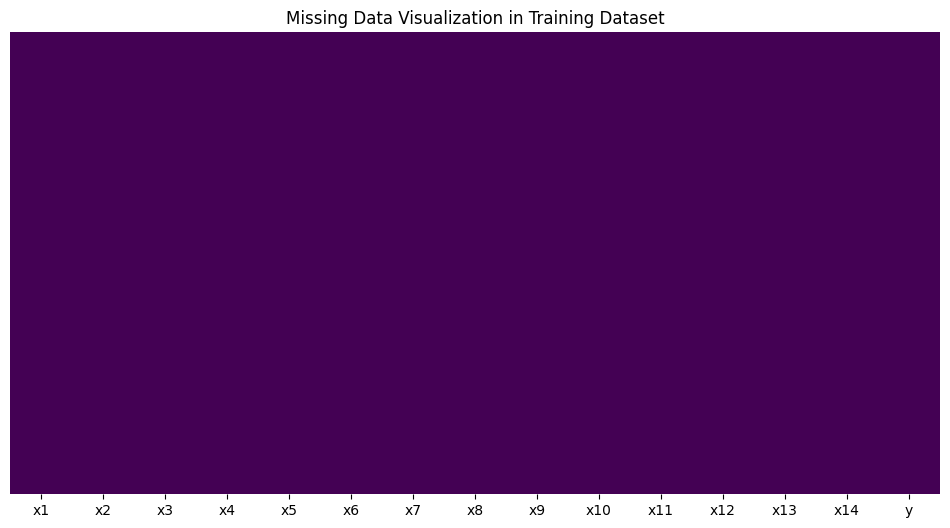

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
train_data = pd.read_csv('TrainData.csv')  # Adjust the path to your actual data file

# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 6))  # You can adjust the size to better fit your dataset
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Visualization in Training Dataset')
plt.show()


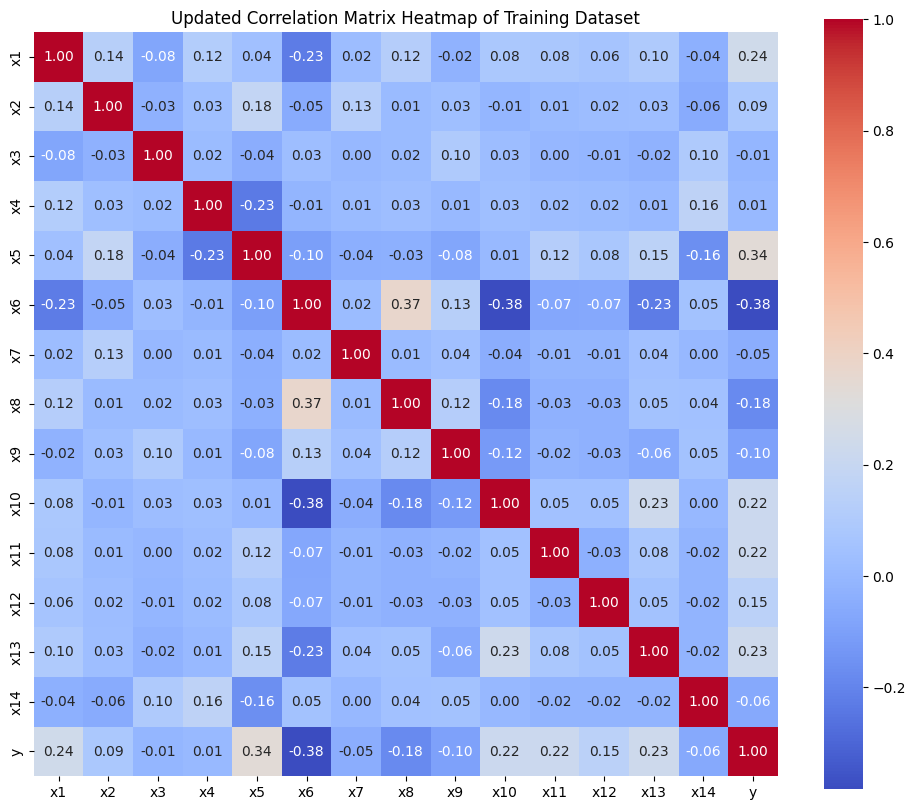

In [ ]:
# Reload the updated training dataset
updated_train_data_path = 'TrainData.csv'
updated_train_data = pd.read_csv(updated_train_data_path)

# Calculate the correlation matrix for the updated training dataset
updated_correlation_matrix = updated_train_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
updated_heatmap = sns.heatmap(updated_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Updated Correlation Matrix Heatmap of Training Dataset')
plt.show()
# multi collinarity missed

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the numerical features from the dataset for VIF calculation
numerical_features = updated_train_data.select_dtypes(include=[np.number])

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]

# Display the VIF
print(vif_data)


   feature   VIF
0       x1 1.186
1       x2 1.349
2       x3 1.027
3       x4 2.027
4       x5 1.262
5       x6 2.735
6       x7 2.914
7       x8 4.599
8       x9 1.192
9      x10 2.452
10     x11 1.063
11     x12 1.031
12     x13 1.135
13     x14 1.137
14       y 1.930


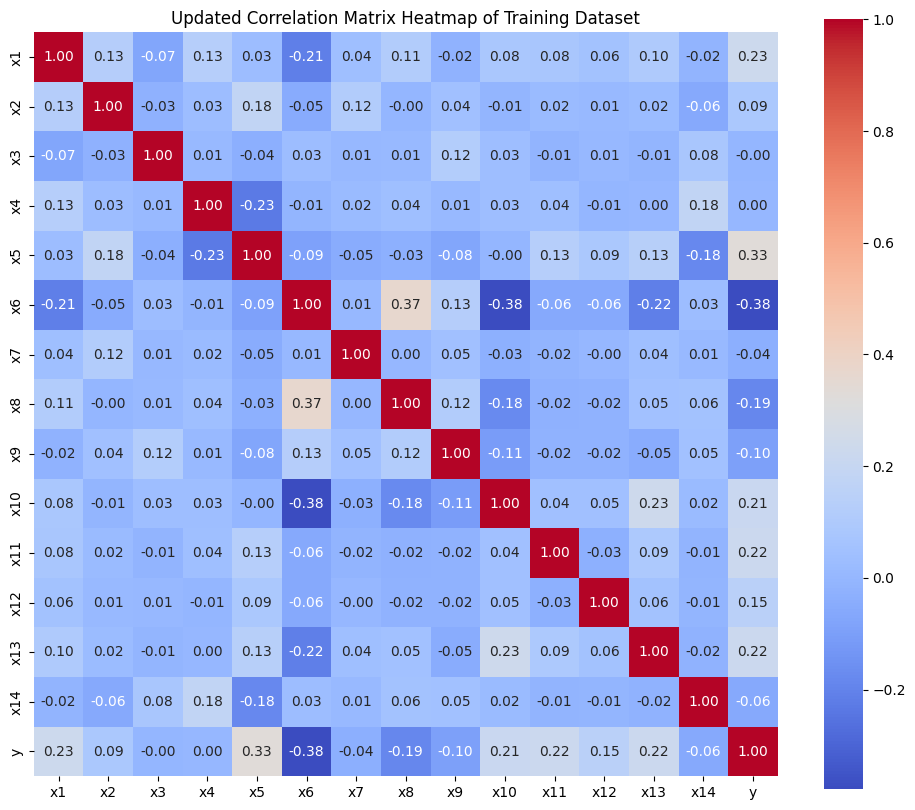

In [ ]:
# Reload the updated training dataset
updated_train_data_path = 'TestData.csv'
updated_train_data = pd.read_csv(updated_train_data_path)

# Calculate the correlation matrix for the updated training dataset
updated_correlation_matrix = updated_train_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
updated_heatmap = sns.heatmap(updated_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Updated Correlation Matrix Heatmap of Training Dataset')
plt.show()


Traning the model!

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load and preprocess the data
def load_data(filename):
    data = pd.read_csv(filename)
    X = data[['x1', 'x5', 'x6', 'x10','x13']]  # Selected features based on correlation analysis
    y = data['y']
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y

# Load training data
X, y = load_data('TrainData.csv')

# Split the training data into 70% training and 30% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression on 70% of the training data
print("\nTraining Logistic Regression on 70% of the training data...")
logistic_model = LogisticRegression(random_state=42, max_iter=1000, tol=1e-4)
logistic_model.fit(X_train, y_train)

# Evaluate on validation data (30% of the training data)
y_val_pred = logistic_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

print("\nLogistic Regression Results on Validation Data (30% of the training data):")
print(f"Accuracy: {val_accuracy:.4f}")
print("Confusion Matrix:")
print(val_conf_matrix)
print("Classification Report:")
print(val_class_report)



Training Logistic Regression on 70% of the training data...

Logistic Regression Results on Validation Data (30% of the training data):
Accuracy: 0.8156
Confusion Matrix:
[[6287  480]
 [1189 1093]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.93      0.88      6767
           1       0.69      0.48      0.57      2282

    accuracy                           0.82      9049
   macro avg       0.77      0.70      0.72      9049
weighted avg       0.80      0.82      0.80      9049



In [ ]:
# Load test data
X_test, y_test = load_data('TestData.csv')

# Train Logistic Regression on the entire training data
print("\nTraining Logistic Regression on the entire training data...")
logistic_model.fit(X, y)

# Evaluate on test data
print("\nEvaluating Logistic Regression on test data...")
y_test_pred = logistic_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("\nLogistic Regression Results on Test Data:")
print(f"Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)
print("Classification Report:")
print(test_class_report)



Training Logistic Regression on the entire training data...

Evaluating Logistic Regression on test data...

Logistic Regression Results on Test Data:
Accuracy: 0.8125
Confusion Matrix:
[[10478   882]
 [ 1942  1758]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.92      0.88     11360
           1       0.67      0.48      0.55      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.70      0.72     15060
weighted avg       0.80      0.81      0.80     15060




Training Logistic Regression on 70% of the training data...

Logistic Regression Results on Validation Data (30% of the training data):
Accuracy: 0.8156
Confusion Matrix:
[[6287  480]
 [1189 1093]]
Classification Report:
Precision: 0.6949
Recall: 0.4790
F1-score: 0.5671
ROC-AUC: 0.8600


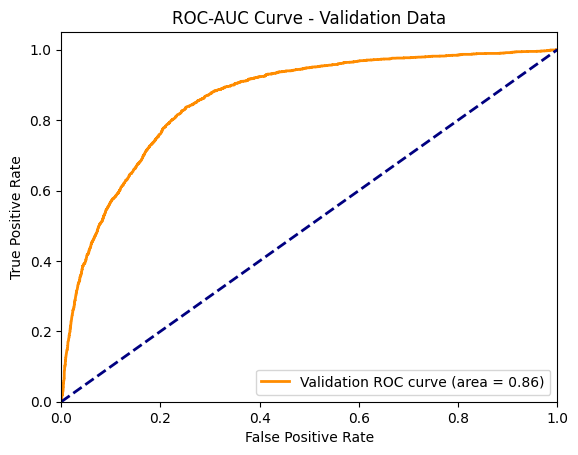

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

# Load and preprocess the data
def load_data(filename):
    data = pd.read_csv(filename)
    X = data[['x1', 'x5', 'x6', 'x10','x13']]  # Selected features based on correlation analysis
    y = data['y']
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y

# Load training data
X, y = load_data('TrainData.csv')

# Split the training data into 70% training and 30% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression on 70% of the training data
print("\nTraining Logistic Regression on 70% of the training data...")
logistic_model = LogisticRegression(random_state=42, max_iter=1000, tol=1e-4)
logistic_model.fit(X_train, y_train)

# Evaluate on validation data (30% of the training data)
y_val_pred = logistic_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred, output_dict=True)

# Calculate ROC-AUC
y_val_proba = logistic_model.predict_proba(X_val)[:, 1]
val_roc_auc = roc_auc_score(y_val, y_val_proba)
val_fpr, val_tpr, _ = roc_curve(y_val, y_val_proba)

print("\nLogistic Regression Results on Validation Data (30% of the training data):")
print(f"Accuracy: {val_accuracy:.4f}")
print("Confusion Matrix:")
print(val_conf_matrix)
print("Classification Report:")
print(f"Precision: {val_class_report['1']['precision']:.4f}")
print(f"Recall: {val_class_report['1']['recall']:.4f}")
print(f"F1-score: {val_class_report['1']['f1-score']:.4f}")
print(f"ROC-AUC: {val_roc_auc:.4f}")

# Plot ROC-AUC curve for validation data
plt.figure()
plt.plot(val_fpr, val_tpr, color='darkorange', lw=2, label=f'Validation ROC curve (area = {val_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Validation Data')
plt.legend(loc='lower right')
plt.show()



Evaluating Logistic Regression on test data...

Logistic Regression Results on Test Data:
Accuracy: 0.8128
Confusion Matrix:
[[10494   866]
 [ 1953  1747]]
Classification Report:
Precision: 0.6686
Recall: 0.4722
F1-score: 0.5535
ROC-AUC: 0.8567


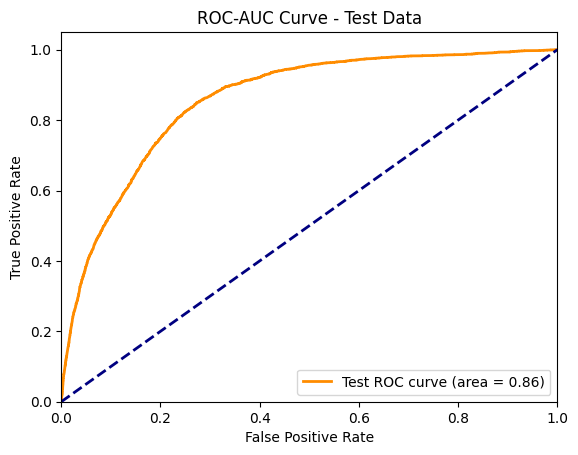

In [ ]:
# Load test data
X_test, y_test = load_data('TestData.csv')

# Evaluate on test data
print("\nEvaluating Logistic Regression on test data...")
y_test_pred = logistic_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred, output_dict=True)

# Calculate ROC-AUC
y_test_proba = logistic_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_proba)

print("\nLogistic Regression Results on Test Data:")
print(f"Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)
print("Classification Report:")
print(f"Precision: {test_class_report['1']['precision']:.4f}")
print(f"Recall: {test_class_report['1']['recall']:.4f}")
print(f"F1-score: {test_class_report['1']['f1-score']:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")

# Plot ROC-AUC curve for test data
plt.figure()
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'Test ROC curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Test Data')
plt.legend(loc='lower right')
plt.show()


Training Logistic Regression on the entire training data...

Logistic Regression Results on the entire training data:
Accuracy: 0.8140
Confusion Matrix:
[[20918  1736]
 [ 3874  3634]]
Classification Report:
Precision: 0.6767
Recall: 0.4840
F1-score: 0.5644
ROC-AUC: 0.8599


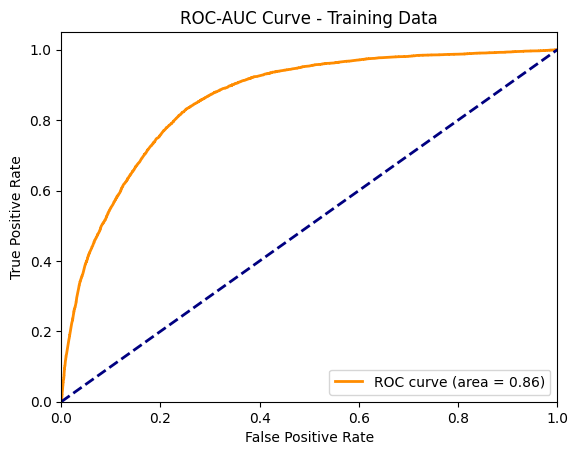

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Load and preprocess the data
def load_data(filename):
    data = pd.read_csv(filename)
    X = data[['x1', 'x5', 'x6', 'x10', 'x13']]  # Selected features based on correlation analysis
    y = data['y']
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y

# Load training data
X, y = load_data('TrainData.csv')

# Train Logistic Regression on the entire training data
print("\nTraining Logistic Regression on the entire training data...")
logistic_model = LogisticRegression(random_state=42, max_iter=1000, tol=1e-4)
logistic_model.fit(X, y)

# Evaluate on the same training data (now as 'test' data)
y_pred = logistic_model.predict(X)
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred, output_dict=True)

# Calculate ROC-AUC
y_proba = logistic_model.predict_proba(X)[:, 1]
roc_auc = roc_auc_score(y, y_proba)
fpr, tpr, _ = roc_curve(y, y_proba)

print("\nLogistic Regression Results on the entire training data:")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(f"Precision: {class_report['1']['precision']:.4f}")
print(f"Recall: {class_report['1']['recall']:.4f}")
print(f"F1-score: {class_report['1']['f1-score']:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Plot ROC-AUC curve for the training data
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Training Data')
plt.legend(loc='lower right')
plt.show()
